In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd

In [68]:
lp_base = '//media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/trained_models/svm/HTNet_data/cikk/64_grid/'
lp_accs = 'accs_all.pkl'
lp_summ = 'accs_summary.txt'
res = pd.read_pickle(lp_base+lp_accs)

pats = list(res.keys())
trials = list(res[pats[0]])

In [69]:
htnet_path = '/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/trained_models/htnet/htnet_data/htnet_original'

pwr_path = 'single_sbjs_power'
pwr_log_path = 'single_sbjs_power_log'
rel_pwr_path = 'single_sbjs_relative_power'
phase_path = 'single_sbjs_phase'

# TO CHECK ALL HTNET RESULTS
'''for mod in [pwr_path, pwr_log_path, phase_path]:
    print(mod)
    res_mod = []
    for pat in pats:
        res_all = np.load(htnet_path + '/' + mod + '/acc_eegnet_hilb_{}_testday_last.npy'.format(pat))
        res_pat = np.mean(res_all[:,2])
        res_mod.append(res_pat)
        if mod == 'single_sbjs_phase' and pat == 'EC07': break
    print(res_mod)
    res_mod_mean = np.mean(np.asarray(res_mod))
    print(res_mod_mean)'''

res_mod = []
for pat in pats:
    res_ht = np.load(htnet_path + '/' + pwr_log_path + '/acc_eegnet_hilb_{}_testday_last.npy'.format(pat))
    res_pat = np.mean(res_ht[:,2])
    res_mod.append(res_pat)
print(np.round(np.asarray(np.mean(res_mod)), 2), '% ± ', np.round(np.std(res_mod)*100), '% (mean ± SD)')

res_ht = res_mod

0.84 % ±  8.0 % (mean ± SD)


In [70]:
baseline_all = {'train':[], 'test':[]}
greedy_all = {'train':[], 'test':[]}

num_feat = {'baseline': [],
            'greedy': []}

for patient in pats:
    baseline_temp = res[patient]['baseline']
    baseline_all["train"].append(baseline_temp[0]*100)
    baseline_all["test"].append(baseline_temp[1]*100)

    num_chans = len(res[patient]['all_features']['train']['freq_range'])
    num_freqs = len(res[patient]['all_features']['train']['freq_range'][0])
    num_feat['baseline'].append(num_chans*num_freqs)

    greedy_temp = res[patient]['greedy']
    greedy_all["train"].append(greedy_temp[0][-1]*100)
    greedy_all["test"].append(greedy_temp[1][-1]*100)

    num_feat['greedy'].append(len(greedy_temp[2]))

x = np.arange(len(pats))  # the label locations
width = 0.50  # the width of the bars


No handles with labels found to put in legend.


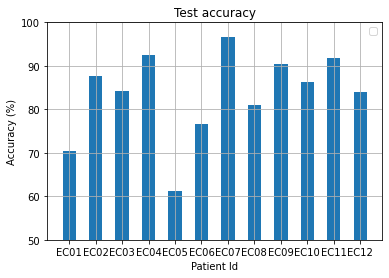

In [71]:
plt.bar(x, baseline_all["test"], width)
plt.ylabel('Accuracy (%)')
plt.xlabel('Patient Id')
plt.title('Test accuracy')
plt.ylim((50,100))
plt.xticks(x, labels=pats)
plt.legend()
plt.grid()
# plt.savefig('figs/accs_all.png')
plt.show()


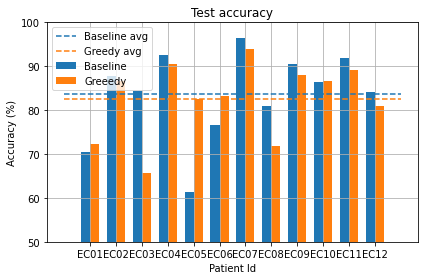

In [72]:
averages = {'baseline': np.mean(np.asarray(baseline_all["test"])),
            'greedy': np.mean(np.asarray(greedy_all["test"])),
            'htnet': np.mean(np.asarray([100*x for x in res_ht])),
            }
x = np.arange(len(pats))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, baseline_all['test'], width, label='Baseline', color='C0')
rects2 = ax.bar(x + width/2, greedy_all["test"], width, label='Greeedy', color='C1')

ax.hlines(averages['baseline'], x[0]-1, x[-1]+1, linestyle='dashed', label='Baseline avg', colors='C0')
ax.hlines(averages['greedy'], x[0]-1, x[-1]+1, linestyle='dashed', label='Greedy avg', colors='C1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
plt.ylabel('Accuracy (%)')
plt.xlabel('Patient Id')
plt.title('Test accuracy')
plt.ylim((50,100))
ax.set_xticklabels(pats)
ax.legend()
ax.grid()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
#plt.savefig('figs/baseline_vs_htnet.png')
plt.show()

In [73]:
[100*x for x in res_ht]

[86.73835125448028,
 71.85185185185185,
 83.66013071895425,
 71.8840579710145,
 75.1937984496124,
 88.61111111111111,
 97.30250481695569,
 81.36704119850187,
 84.92063492063492,
 87.55411255411255,
 93.29710144927537,
 81.15183246073299]

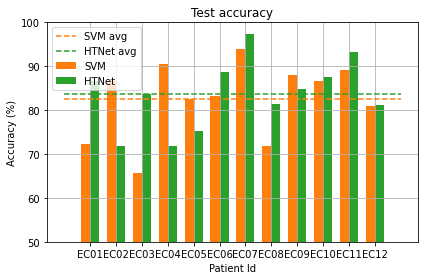

In [74]:
x = np.arange(len(pats))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, greedy_all['test'], width, label='SVM', color='C1')
rects2 = ax.bar(x + width/2, [100*x for x in res_ht], width, label='HTNet', color='C2')

ax.hlines(averages['greedy'], x[0]-1, x[-1]+1, linestyle='dashed', label='SVM avg', colors='C1')
ax.hlines(averages['htnet'], x[0]-1, x[-1]+1, linestyle='dashed', label='HTNet avg', colors='C2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
plt.ylabel('Accuracy (%)')
plt.xlabel('Patient Id')
plt.title('Test accuracy')
plt.ylim((50,100))
ax.set_xticklabels(pats)
ax.legend()
ax.grid()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig('figs/svm_v_htnet')
plt.show()

In [75]:
def custom_plot(data, title):
    fig = plt.figure(figsize=(8,5))
    #fig.patch.set_facecolor('white')
    plt.imshow(data)

    ax = plt.gca()

    # Major ticks
    ax.set_xticks(np.arange(0, 8, 1))
    ax.set_yticks(np.arange(0, 8, 1))

    # Labels for major ticks
    ax.set_xticklabels(np.arange(1, 8+1, 1))
    ax.set_yticklabels(np.arange(1, 8+1, 1))

    # Minor ticks
    ax.set_xticks(np.arange(.5, 8, 1), minor=True)
    ax.set_yticks(np.arange(.5, 8, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='silver', linestyle='--', linewidth=1)
    plt.title(title)
    plt.colorbar()
    plt.show()

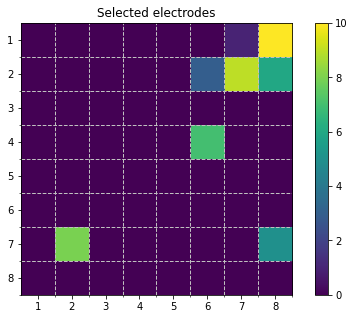

In [76]:
patient = 'EC12'

greedy = res[patient]['greedy']

channels = greedy[2]
ranges = greedy[3]

grid = np.zeros(64)

for i, channel in enumerate(channels):
    if channel>63:
        print('pass')
        continue
    grid[channel] = i+1


# plot grid
custom_plot(grid.reshape(8,8), 'Selected electrodes')

[16 10 16  5 18 32]


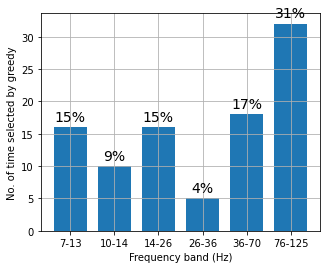

In [77]:
count_all = []

for patient in pats:
    greedy = res[patient]['greedy']
    channels = greedy[2]
    ranges = greedy[3]

    count_ranges = []
    for i in range(6):
        count_ranges.append(np.sum(np.asarray(ranges)==i))
    count_all.append(count_ranges)

    #print(patient)
    #plt.bar(np.arange(6), count_ranges)
    #plt.show()

summed_count_all = np.sum(np.asarray(count_all), axis=0)

print(summed_count_all)

fig = plt.figure(figsize=(5,4))
plt.bar(np.arange(6), summed_count_all, width=0.75)

for index, data in enumerate(summed_count_all):
    percent = int(np.sum(summed_count_all)*data*0.01)
    plt.text(x=index , y=data+1 , s=str(percent)+'%' , fontdict=dict(fontsize=14), ha='center')

plt.xticks(np.arange(6), labels=['7-13', '10-14', '14-26', '26-36', '36-70', '76-125'])
plt.xlabel('Frequency band (Hz)')
plt.ylabel('No. of time selected by greedy')
plt.grid()
plt.show()

82.56084656084657


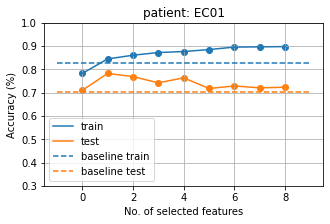

74.98368298368298


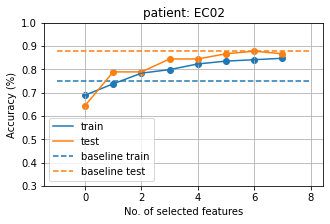

90.66008203799655


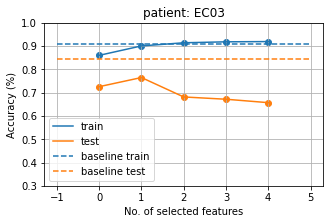

77.85827604442093


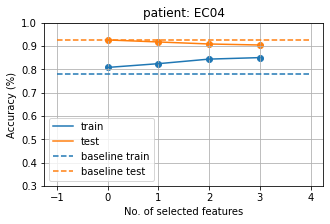

86.55172413793103


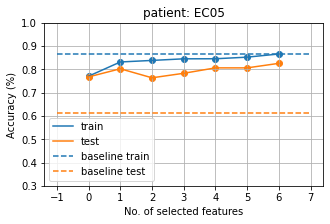

89.91304347826087


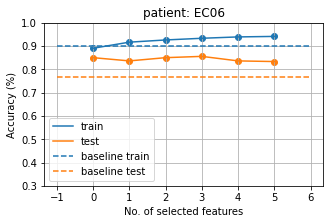

95.5179104477612


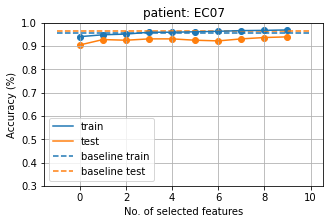

89.28452532874662


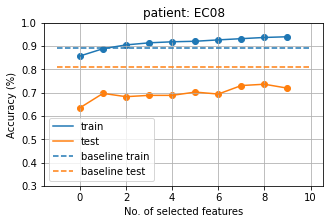

80.38461538461539


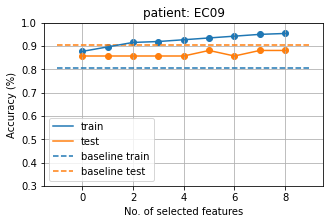

90.34385601748032


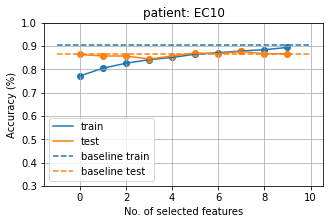

87.22436372621696


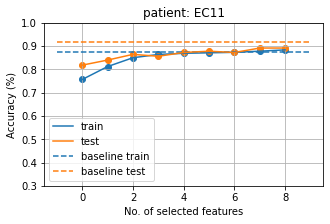

82.60835355058684


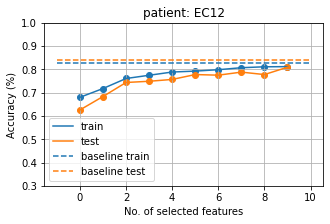

In [78]:
for i, patient in enumerate(pats):
    greedy = res[patient]['greedy']

    fig, ax = plt.subplots(figsize=(5,3))

    ax.scatter(np.arange(len(greedy[0])), greedy[0])
    ax.plot(greedy[0], label='train')

    ax.scatter(np.arange(len(greedy[0])), greedy[1])
    ax.plot(greedy[1], label='test')

    ax.hlines(0.01*baseline_all["train"][i], 0-1, len(greedy[0]), linestyle='dashed', label='baseline train', colors='C0')
    ax.hlines(0.01*baseline_all["test"][i], 0-1, len(greedy[0]), linestyle='dashed', label='baseline test', colors='C1')
    print(baseline_all["train"][i])

    ax.legend()
    plt.ylim((0.3, 1))
    plt.title('patient: {}'.format(patient))
    plt.xlabel('No. of selected features')
    plt.ylabel('Accuracy (%)')

    ax.grid()
    plt.savefig('figs/del/{}_greedy.png'.format(patient))
    plt.show()

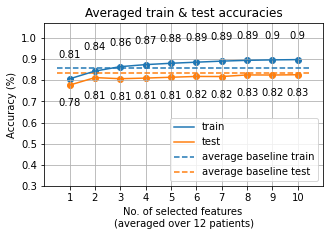

In [79]:
sum_accs_train = []
sum_accs_test = []

for patient in pats:
    greedy = res[patient]['greedy']

    greedy_train_temp = greedy[0]
    greedy_test_temp = greedy[1]

    while len(greedy[0]) < 10:
        greedy_train_temp.append(greedy_train_temp[-1])
        greedy_test_temp.append(greedy_test_temp[-1])

    sum_accs_train.append(greedy_train_temp)
    sum_accs_test.append(greedy_test_temp)

accs_train = np.mean(np.asarray(sum_accs_train), axis=0)
accs_test = np.mean(np.asarray(sum_accs_test), axis=0)


fig, ax = plt.subplots(figsize=(5,3))

ax.scatter(np.arange(len(greedy[0])), accs_train)
ax.plot(accs_train, label='train')

ax.scatter(np.arange(len(greedy[0])), accs_test)
ax.plot(accs_test, label='test')

for i, data in enumerate(accs_train):
    ax.text(x=i , y=data+0.1 , s=str(np.round(data, 2)) , fontdict=dict(fontsize=10), ha='center')

for i, data in enumerate(accs_test):
    ax.text(x=i , y=data-0.1 , s=str(np.round(data, 2)) , fontdict=dict(fontsize=10), ha='center')

ax.hlines(0.01*np.mean(np.asarray(baseline_all["train"])), -.5, 9.5, linestyle='dashed', label='average baseline train', colors='C0')
ax.hlines(0.01*np.mean(np.asarray(baseline_all["test"])), -.5, 9.5, linestyle='dashed', label='average baseline test', colors='C1')

ax.legend(loc=4)
plt.ylim((0.3, 1.07))
plt.xticks(np.arange(len(accs_test)), labels=np.arange(1, len(accs_test)+1, 1))
plt.title('Averaged train & test accuracies')
plt.xlabel('No. of selected features \n(averaged over 12 patients)')
plt.ylabel('Accuracy (%)')

ax.grid()
plt.savefig('figs/avg_greedy')
plt.show()


In [80]:
np.mean(np.asarray(res_ht))

0.8362771072976981